In [1]:
import torch

# Single value backprop

In [23]:
w = torch.tensor([3.], requires_grad=True)
x = torch.tensor([2.], requires_grad=False)
y = torch.tensor([2.], requires_grad=False)

In [24]:
def mse(y, y_hat):
    return (y-y_hat)**2

def d_mse(y, y_hat):
    return -2*(y-y_hat)

In [25]:
cost = mse(y, w*x)

In [26]:
w.grad

In [27]:
cost.backward()

In [28]:
w.grad

tensor([16.])

In [29]:
d_mse(y, w*x)*x

tensor([16.], grad_fn=<MulBackward0>)

---

# Matrix mult backprop

In [258]:
w = torch.tensor([[3., 1.]], requires_grad=True)
x = torch.tensor([[2.], [1.]], requires_grad=False)
y = torch.tensor([[5., 2.], [2.5, 2.]], requires_grad=False)

In [259]:
z = x@w
z

tensor([[6., 2.],
        [3., 1.]], grad_fn=<MmBackward0>)

In [260]:
loss = mse(y, z)

In [261]:
loss

tensor([[1.0000, 0.0000],
        [0.2500, 1.0000]], grad_fn=<PowBackward0>)

In [262]:
w.grad

In [263]:
loss.sum().backward()

In [264]:
w.grad

tensor([[ 5., -2.]])

In [268]:
x.shape

torch.Size([2, 1])

In [94]:
g = x.T @ d_mse(y, z)
w.grad = g

In [95]:
w.grad

tensor([[ 5., -2.]], grad_fn=<MmBackward0>)

---

# Activation function backprop

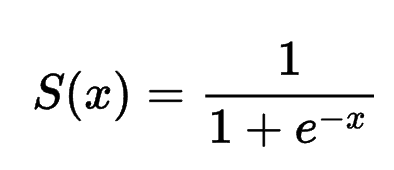

In [287]:
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

def d_sigmoid(x):
    #return torch.exp(-x)/(1+torch.exp(-x))**2
    return sigmoid(x)*(1-sigmoid(x))

In [288]:
w = torch.tensor([[3.]], requires_grad=True)
b = torch.tensor([[1.]], requires_grad=True)
x = torch.tensor([[2.], [-2.]], requires_grad=False)
y = torch.tensor([[1.], [1.5]], requires_grad=False)

In [289]:
# forward

s = x@w+b
y_hat = sigmoid(s)
y_hat

tensor([[0.9991],
        [0.0067]], grad_fn=<MulBackward0>)

In [290]:
loss = mse(y, y_hat)
loss

tensor([[8.2992e-07],
        [2.2300e+00]], grad_fn=<PowBackward0>)

In [291]:
w.grad, b.grad

(None, None)

In [292]:
loss.sum().backward()

In [293]:
w.grad, b.grad

(tensor([[0.0397]]), tensor([[-0.0199]]))

In [294]:
#backward

#w
(x * d_sigmoid(s)).T @ d_mse(y, y_hat)

tensor([[0.0397]], grad_fn=<MmBackward0>)

In [295]:
#b
(1 * d_sigmoid(s)).T @ d_mse(y, y_hat)

tensor([[-0.0199]], grad_fn=<MmBackward0>)